# Cleveland Heart Disease

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

The Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). Additional data (albeit extensively missing data) from Long Beach VA, Hungary, Switzerland in the same format.

Missing data - https://www.analyticsvidhya.com/blog/2022/05/handling-missing-values-with-random-forest/

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from missingpy import MissForest
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from plot_confusion_matrix import plot_confusion_matrix

C:\Users\joeba\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
path = 'C:/ML/heart disease/processed.cleveland.data'

df = pd.read_csv(path, encoding='utf8', header=None, na_values='?')    
cols = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df.columns = cols

df['loc'] = 0

df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,0


In [3]:
path = 'C:/ML/heart disease/processed.long-beach-va.data'

df2 = pd.read_csv(path, encoding='utf8', header=None, na_values='?')    
cols = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2.columns = cols

df2['loc'] = 1
df2

df = df.append(df2)
df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,NaN,NaN,NaN,1,1
196,62.0,1.0,1.0,NaN,139.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
197,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,NaN,NaN,6.0,2,1
198,58.0,1.0,4.0,NaN,385.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [4]:
path = 'C:/ML/heart disease/reprocessed.hungarian.data'

df2 = pd.read_csv(path, encoding='utf8', header=None, na_values='-9', sep=' ')    
cols = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2.columns = cols

df2 = df2.drop(index=294)

df2['loc'] = 2
df2

df = df.append(df2)
df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0,2
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0,2
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0,2
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0,2


In [5]:
path = 'C:/ML/heart disease/processed.switzerland.data'

df2 = pd.read_csv(path, encoding='utf8', header=None, na_values='?')    
cols = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df2.columns = cols

df2['chol'] = np.NaN

df2['loc'] = 3
df2

df = df.append(df2)
df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,NaN,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1.0,3
119,70.0,1.0,4.0,140.0,NaN,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3.0,3
120,72.0,1.0,3.0,160.0,NaN,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0.0,3
121,73.0,0.0,3.0,160.0,NaN,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1.0,3


In [6]:
df = df.reset_index(drop=True)

df.isna().sum()

age          0
sex          0
cp           0
restbps     59
chol       153
fbs         90
restecg      2
thalach     55
exang       55
oldpeak     62
slope      309
ca         610
thal       486
num          0
loc          0
dtype: int64

In [7]:
imputer = MissForest() #miss forest
X_imputed = imputer.fit_transform(df)
X_imputed = pd.DataFrame(X_imputed, columns = df.columns).round(1)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7


In [8]:
df = X_imputed.copy()

In [9]:
df

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,loc
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,0.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115.0,226.5,0.0,1.0,92.0,1.0,0.0,2.0,1.6,7.0,1.0,3.0
916,70.0,1.0,4.0,140.0,263.5,1.0,0.0,157.0,1.0,2.0,2.0,1.9,7.0,3.0,3.0
917,72.0,1.0,3.0,160.0,272.7,0.4,2.0,114.0,0.0,1.6,2.0,2.0,5.5,0.0,3.0
918,73.0,0.0,3.0,160.0,252.8,0.0,1.0,121.0,0.0,0.0,1.0,3.1,3.0,1.0,3.0


In [10]:
df.isna().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
loc        0
dtype: int64

In [11]:
df.dtypes

age        float64
sex        float64
cp         float64
restbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
num        float64
loc        float64
dtype: object

In [12]:
# note the num column has only TWO values - absence or presence of disease
df['num'].value_counts()

0.0    411
1.0    196
2.0    135
3.0    135
4.0     43
Name: num, dtype: int64

In [13]:
X = df.iloc[:,0:12]
y = df.iloc[:,13]

sm = SMOTE(sampling_strategy={0:411,1:411,2:411,3:411,4:411})
X, y = sm.fit_resample(X, y)

#ss = StandardScaler()
#X = ss.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [14]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1849, 12) (1849,) (206, 12) (206,)


In [15]:
y_test.value_counts()

4.0    48
1.0    46
3.0    43
2.0    41
0.0    28
Name: num, dtype: int64

In [16]:
# hyperparameter optimisation
params = {
    'n_estimators' : [ 1000 ],
    'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 14, 16 ],
    #'min_impurity_decrease' : [ 0.1, 0.2, 0.3, 0.4 ]
}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, params)
clf.fit(X_train, y_train)

clf.best_params_

{'max_depth': 16, 'n_estimators': 1000}

accuracy  0.8300970873786407


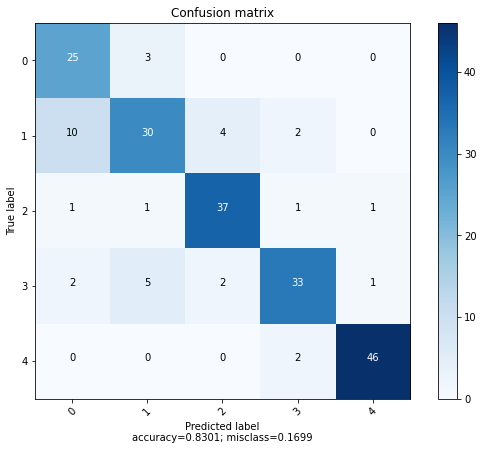

In [17]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('accuracy ', accuracy_score(y_test, y_pred))
#print('roc auc ', roc_auc_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, target_names=['0', '1', '2', '3', '4'], normalize=False)